In [1]:
import pandas as pd

## data dictionary

In [2]:
datadic=pd.read_csv("data dictionary.csv")
varVSdes = datadic[["Variable Name","Description"]]
varVSdes

,Variable Name,Description
0,age,NaN
1,sex,sex (1 = male; 0 = female)
2,cp,chest pain type -- Value 1: typical angina -- ...
3,trestbps,resting blood pressure (on admission to the ho...
4,chol,serum cholestoral
5,fbs,fasting blood sugar > 120 mg/dl (1 = true; 0 =...
6,restecg,resting electrocardiographic results -- Value ...
7,thalach,maximum heart rate achieved
8,exang,exercise induced angina (1 = yes; 0 = no)
9,oldpeak,ST depression induced by exercise relative to ...


## preparing tools

In [3]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import joblib

## Models
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [4]:
df = pd.read_csv("45 - heart-disease.csv")
df.isna().sum()
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


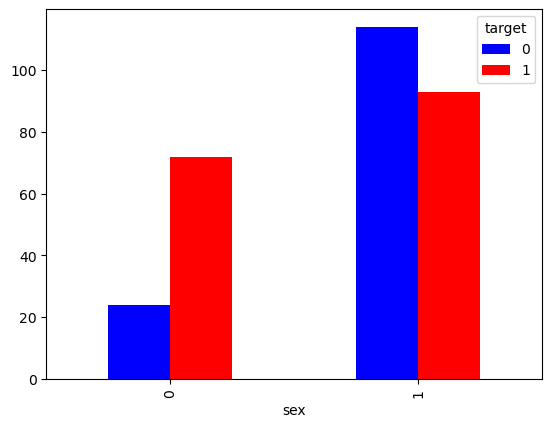

In [5]:
pd.crosstab(df["sex"],df["target"]).plot(kind="bar",color=["b","r"]);

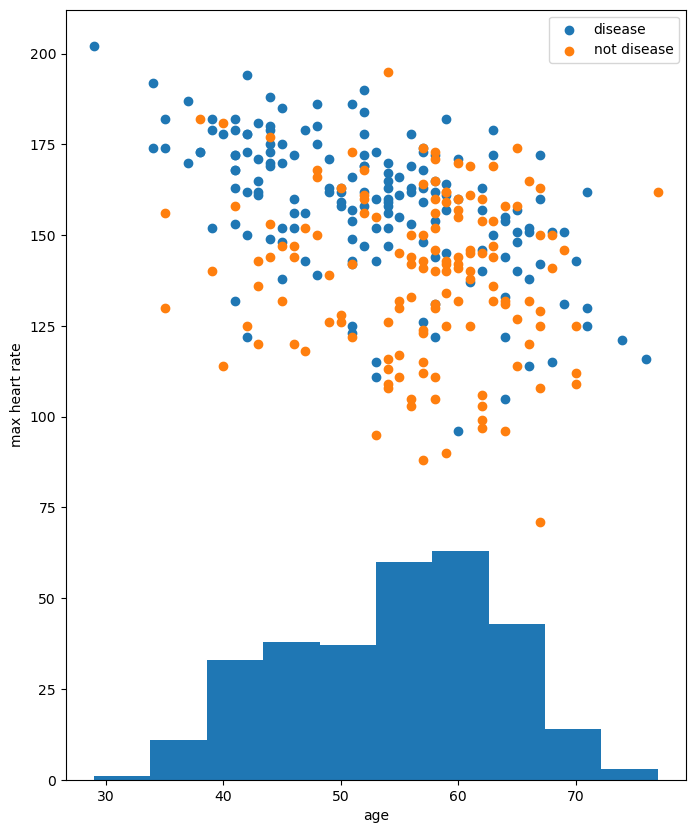

In [6]:
plt.figure(figsize=(8,10))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1])
plt.scatter(df.age[df.target==0],df.thalach[df.target==0])
df.age.plot.hist()
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["disease","not disease"])

<Axes: xlabel='cp'>

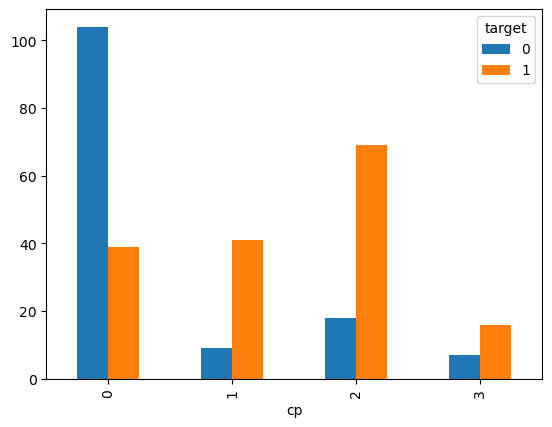

In [7]:
pd.crosstab(df.cp,df.target).plot(kind="bar")


In [8]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

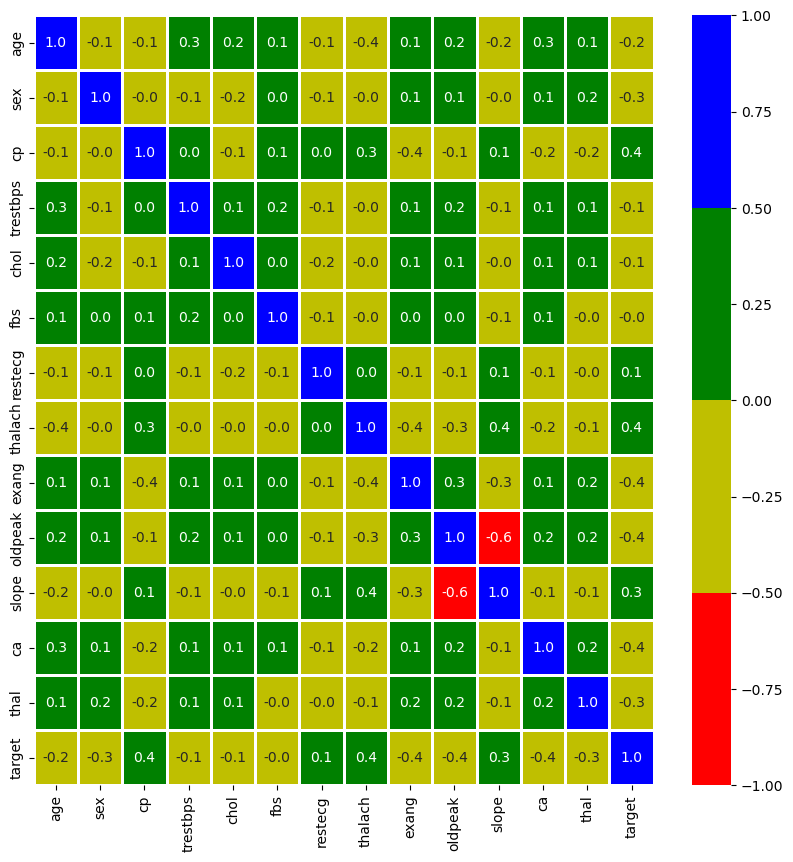

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap=["r","y","g","b"],fmt=".1f",linewidths=1,annot=True,vmax=1,vmin=-1)

## prepairing data and using ML
* models :
* logistic regression
* kneighbor nearest
* randomforrest regression

In [5]:
x = df.drop("target",axis=1)
y = df["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [13]:
models = {"logestic regression":LogisticRegression()
          ,"kneighbor nearest":KNeighborsClassifier()
          ,"randomforrest regression": RandomForestClassifier()}
def test_models (models,x_train,x_test,y_train,y_test):
    np.random.seed(1)
    result={}
    final_result =[]
    for key , value in (models.items()):
        value.fit(x_train,y_train)
        result[key]=round(value.score(x_test,y_test),2) 
    return result
    
def test_models_hyperparams (y_test,y_preds):
    input_dict = {
    'f1': round(f1_score(y_test,y_preds),2),
    'recall': round(recall_score(y_test,y_preds),2),
    'precision': round(precision_score(y_test,y_preds),2)
        }
    pprint.pprint(input_dict)

In [158]:
test_models(models,x_train,x_test,y_train,y_test)

C:\Users\user\Desktop\HeartDiseaseML\envs\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logestic regression': 0.82,
 'kneighbor nearest': 0.73,
 'randomforrest regression': 0.84}

## Kneighbor improving

In [82]:
gridForKneighbor = {"n_neighbors":[2,5,10,50,100],
    # "weights":'uniform',
    # "algorithm":'auto',
    "leaf_size":[10,30,50],
   }
rsv =RandomizedSearchCV(KNeighborsClassifier(),param_distributions= gridForKneighbor,n_iter=15,cv=4,verbose=2)
autpk = rsv.fit(x_train,y_train)
autpk.best_params_

Fitting 4 folds for each of 15 candidates, totalling 60 fits
[CV] END ........................leaf_size=10, n_neighbors=2; total time=   0.0s
[CV] END ........................leaf_size=10, n_neighbors=2; total time=   0.0s
[CV] END ........................leaf_size=10, n_neighbors=2; total time=   0.0s
[CV] END ........................leaf_size=10, n_neighbors=2; total time=   0.0s
[CV] END ........................leaf_size=10, n_neighbors=5; total time=   0.0s
[CV] END ........................leaf_size=10, n_neighbors=5; total time=   0.0s
[CV] END ........................leaf_size=10, n_neighbors=5; total time=   0.0s
[CV] END ........................leaf_size=10, n_neighbors=5; total time=   0.0s
[CV] END .......................leaf_size=10, n_neighbors=10; total time=   0.0s
[CV] END .......................leaf_size=10, n_neighbors=10; total time=   0.0s
[CV] END .......................leaf_size=10, n_neighbors=10; total time=   0.0s
[CV] END .......................leaf_size=10, n_

{'n_neighbors': 10, 'leaf_size': 10}

In [83]:

autokpreds = autpk.predict(x_test)
test_models_hyperparams(y_test,autokpreds)

{'f1': 0.68, 'precision': 0.73, 'recall': 0.63}


In [76]:
KNeighborsClassifier().fit(x_train,y_train).score(x_test,y_test)

0.7142857142857143

In [161]:
rsv.best_params_

{'n_neighbors': 10, 'leaf_size': 10}

## tuning logistic regression and randonforest

In [187]:
logistic_grid = {"C":np.logspace(-5,5,20),
                 'solver': ['liblinear']         
               }
forrest_grid = {"n_estimators":np.arange(5,200,50),
               "min_samples_leaf":np.arange(1,20,2),
               "min_samples_split":np.arange(2,20,2),
               "max_depth":[None,10,3,5]}

In [188]:
# np.random.seed(21)
logistic_rsv = RandomizedSearchCV(LogisticRegression(),logistic_grid , cv=5,verbose=2)


In [189]:
logistic_rsv.fit(x_train,y_train)
logistic_rsv.score(x_test,y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .............C=6.1584821106602545, solver=liblinear; total time=   0.0s
[CV] END .............C=6.1584821106602545, solver=liblinear; total time=   0.0s
[CV] END .............C=6.1584821106602545, solver=liblinear; total time=   0.0s
[CV] END .............C=6.1584821106602545, solver=liblinear; total time=   0.0s
[CV] END .............C=6.1584821106602545, solver=liblinear; total time=   0.0s
[CV] END ..............C=8858.667904100832, solver=liblinear; total time=   0.0s
[CV] END ..............C=8858.667904100832, solver=liblinear; total time=   0.0s
[CV] END ..............C=8858.667904100832, solver=liblinear; total time=   0.0s
[CV] END ..............C=8858.667904100832, solver=liblinear; total time=   0.0s
[CV] END ..............C=8858.667904100832, solver=liblinear; total time=   0.0s
[CV] END .............C=0.1623776739188721, solver=liblinear; total time=   0.0s
[CV] END .............C=0.1623776739188721, solv

0.8791208791208791

In [190]:
logistic_rsv.best_params_

{'solver': 'liblinear', 'C': 0.1623776739188721}

## for randomforest

In [176]:
rf_rsv = RandomizedSearchCV(RandomForestClassifier(),forrest_grid , cv=5,verbose=2)


In [ ]:
rf_rsv.fit(x_train,y_train)

In [ ]:
rf_rsv.score(x_test,y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=155; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=155; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=155; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=155; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=155; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=5; total time=   0.0s
[CV] END max_d

0.8351648351648352

In [186]:
rf_rsv.best_params_

{'n_estimators': 55,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': 10}

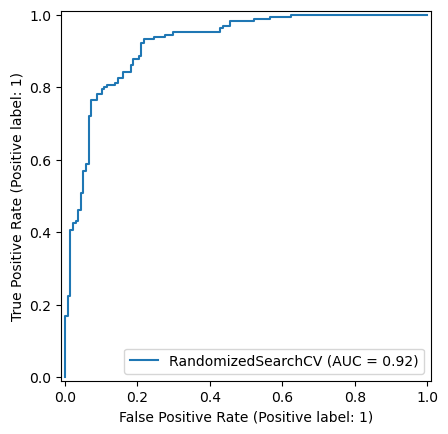

In [208]:
logistic_y_preds=logistic_rsv.predict(x_test)
RocCurveDisplay.from_estimator(logistic_rsv,x,y)

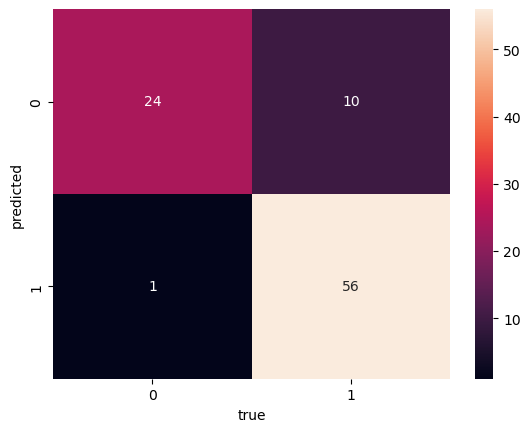

In [210]:
sns.heatmap(confusion_matrix(y_test,logistic_y_preds),annot=True,fmt=".0f")
plt.xlabel("true");
plt.ylabel("predicted");

In [212]:
print(classification_report(y_test,logistic_y_preds))

              precision    recall  f1-score   support

           0       0.96      0.71      0.81        34
           1       0.85      0.98      0.91        57

    accuracy                           0.88        91
   macro avg       0.90      0.84      0.86        91
weighted avg       0.89      0.88      0.87        91



In [221]:
np.mean(cross_val_score(logistic_rsv,x,y,scoring="recall"))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .............C=233.57214690901213, solver=liblinear; total time=   0.0s
[CV] END .............C=233.57214690901213, solver=liblinear; total time=   0.0s
[CV] END .............C=233.57214690901213, solver=liblinear; total time=   0.0s
[CV] END .............C=233.57214690901213, solver=liblinear; total time=   0.0s
[CV] END .............C=233.57214690901213, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ..............C=784.7599703514607, solver=liblinear; total time=   0.0s
[CV] END ..............C=784.7599703514607, solv

0.884848484848485

In [ ]:
clf = LogisticRegression(C=0.1623776739188721,solver="liblinear")

In [71]:
clf.fit(x_train,y_train)

LogisticRegression(C=0.1623776739188721, solver='liblinear')

In [72]:
rf_model = RandomForestClassifier(n_estimators=100).fit(x_train,y_train)

In [73]:
test_models_hyperparams(y_test, rf_model.predict(x_test))

{'f1': 0.82, 'precision': 0.84, 'recall': 0.81}


In [ ]:
clf.coef_

array([[ 1.35317375e-02, -6.23628238e-01,  5.44948552e-01,
        -1.75667860e-02, -6.31971924e-04, -9.11384854e-02,
         4.49248970e-01,  2.30534400e-02, -6.37501234e-01,
        -2.82056908e-01,  3.89809047e-01, -8.00389726e-01,
        -6.27937902e-01]])

In [230]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [232]:
coef_check = pd.DataFrame(clf.coef_,columns= x.columns)
coef_check

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.009654,-0.756962,0.646899,-0.013034,-0.001419,-0.120718,0.377564,0.021844,-0.582607,-0.414909,0.275859,-0.565163,-0.571852


In [238]:
feature_dict = dict(zip(x.columns,clf.coef_[0]))
feature_dict

{'age': 0.009654414853236313,
 'sex': -0.756962040462405,
 'cp': 0.6468988072691855,
 'trestbps': -0.013034158515380964,
 'chol': -0.0014186124360998126,
 'fbs': -0.12071838082250272,
 'restecg': 0.37756402379371223,
 'thalach': 0.02184400346287311,
 'exang': -0.582607295194888,
 'oldpeak': -0.4149094966992886,
 'slope': 0.27585913894430497,
 'ca': -0.5651626009563715,
 'thal': -0.5718517832341259}

<Axes: >

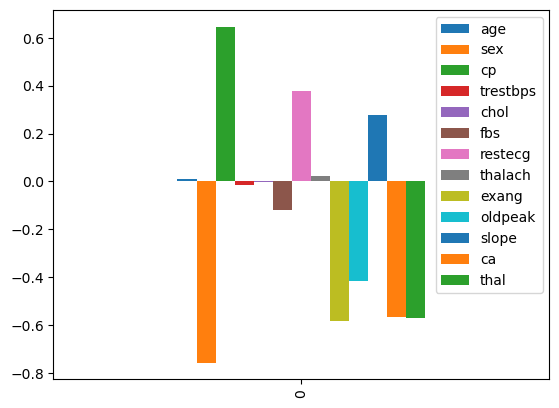

In [251]:
coef_check.plot.bar()

<Axes: >

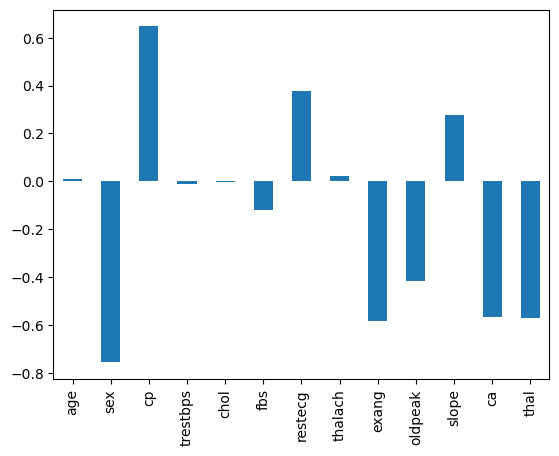

In [249]:
nfeature_dict = pd.DataFrame(feature_dict,index=[0])
nfeature_dict.T.plot.bar(legend=False)

In [48]:
joblib.dump(clf,"Logistic_Regrassion_88.joblib")

['Logistic_Regrassion_88.joblib']

In [49]:
loaded = joblib.load("Logistic_Regrassion_88.joblib")

In [74]:
loaded.score(x_test,y_test)

0.8131868131868132

In [75]:
loaded_preds = loaded.predict(x_test)
test_models_hyperparams(y_test,loaded_preds)

{'f1': 0.84, 'precision': 0.83, 'recall': 0.85}


In [1]:
import xgboost as xgb

In [67]:
train = xgb.DMatrix(x_train,y_train)
test = xgb.DMatrix(x_test,y_test)
params = {'max_depth':10,
          'eta':0.1,
         'objective': 'binary:hinge'
         }
iters = 100

In [68]:
%timeit xgb_model = xgb.train(params,train,iters)

64.7 ms ± 2.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
%timeit xgb_preds = xgb_model.predict(test)

315 μs ± 10.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [47]:
test_models_hyperparams(y_test,xgb_preds)

{'f1': 0.8, 'precision': 0.79, 'recall': 0.81}
